In [27]:
from standardInclude import *

### This notebook just plots the number of 'Chunk size = 0' entries are in each of the nearline log files

All the numbers were extracted from the log files with a simple bash script:

```bash
filePath="/datalocal/nearlineLogs/"
runLow="33000"
runHigh="33500"

allFiles=" "
for run in $(seq $runLow $runHigh);
do
        echo $run
        ding=`ls ${filePath}gm2nearline_*${run}*`
        #echo "Ding" $ding
        allFiles=$allFiles" "${ding}
done

#echo $allFiles

outFile="./numberOfMissedQuerys.txt"
echo "n run subrun" > $outFile

for file in $allFiles;
do
        #echo $file
        run=${file:39:5}
        subrun=${file:45:5}
        ding=`grep -i 'Chunk size = 0' $file | wc -l`
        echo $ding $run $subrun >> $outFile
done
```


---

In [28]:
df = pandas.read_csv("./numberOfMissedQuerys_original.txt", delimiter=" ")

In [29]:
df2 = pandas.read_csv("./numberOfMissedQuerys.txt", delimiter=" ")

In [30]:
df['order'] = df['run']*1000+df['subrun']

In [31]:
df.head()

,n,run,subrun,order
0,1834,33000,1,33000001
1,1666,33000,2,33000002
2,1972,33000,20,33000020
3,2896,33000,24,33000024
4,1609,33000,27,33000027


In [32]:
approximateChangePoint = 33238

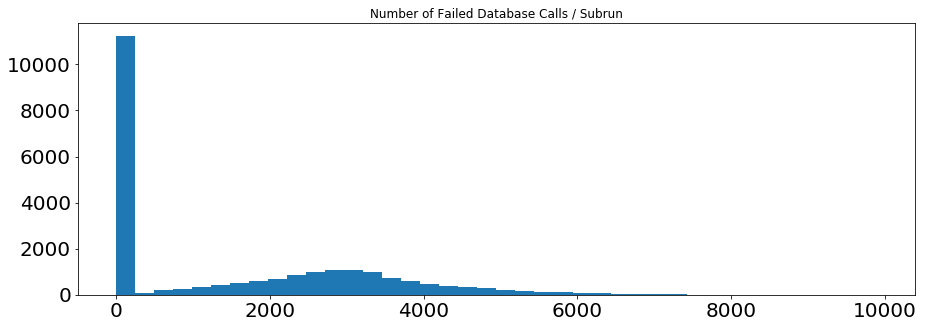

In [33]:
fig,ax = plt.subplots(figsize=(15,5))
plt.hist(df['n'],bins=40)
#plt.yscale('log')
plt.title("Number of Failed Database Calls / Subrun")
plt.show()

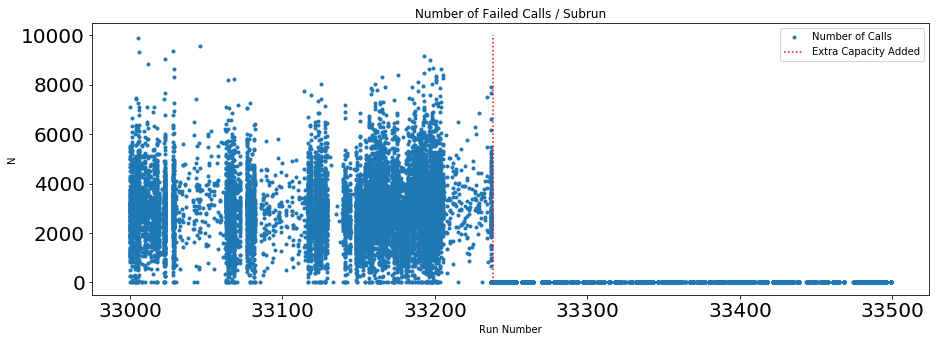

In [34]:
fig,ax = plt.subplots(figsize=(15,5))
plt.plot(df['run'],df['n'],".",label="Number of Calls")
plt.title("Number of Failed Database Calls / Subrun")
plt.plot([approximateChangePoint, approximateChangePoint], [0,10000], 'r:', label="Extra Capacity Added")
plt.title("Number of Failed Calls / Subrun")
plt.ylabel("N")
plt.xlabel("Run Number")
plt.legend()
#plt.ylim(-1,10)
plt.show()

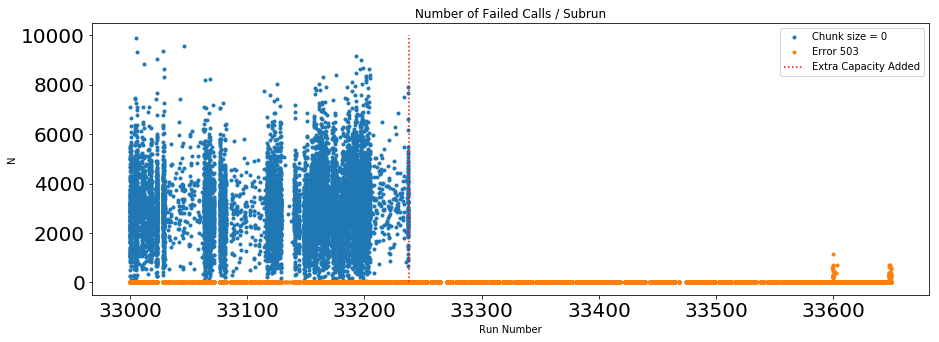

In [35]:
fig,ax = plt.subplots(figsize=(15,5))
plt.plot(df['run'],df['n'],".",label="Chunk size = 0")
plt.plot(df2['run'],df2['n'],".",label="Error 503")
plt.title("Number of Failed Database Calls / Subrun")
plt.plot([approximateChangePoint, approximateChangePoint], [0,10000], 'r:', label="Extra Capacity Added")
plt.title("Number of Failed Calls / Subrun")
plt.ylabel("N")
plt.xlabel("Run Number")
plt.legend()
#plt.ylim(-1,10)
plt.show()